# **Markov Process Example**
## Supposons que l'action Lambda augmente ou diminue selon les règles suivantes :

## Par rapport au cours de clôture de la veille, le cours de clôture du jour en cours est soit supérieur, soit inférieur de quelques points de pourcentage. Pour, par ex. un jour, l'action Lambda clôture en hausse de 2,3% par rapport à la veille. Les autres jours, il pourrait clôturer 0,8 % plus bas que le cours de clôture de la veille.
## Étant donné toute séquence de 3 jours désignée par « jour avant », « hier » et « aujourd'hui », l'action Lambda a clôturé plus haut hier que la veille, il clôturera plus haut aujourd'hui qu'hier avec une probabilité p_11. Par conséquent, il clôturerait plus bas aujourd'hui qu'hier avec une probabilité (1 — p_11).
## Supposons également que si l'action Lambda a clôturé plus bas hier que la veille, la probabilité qu'il clôture à nouveau plus bas aujourd'hui est de p_22. Et par conséquent, la probabilité qu'il clôture plus haut aujourd'hui qu'hier est (1 - p22).

You may have guessed that Acme’s stock price can be modeled using a 2-state Markov process. It’s state transition diagram looks like this:

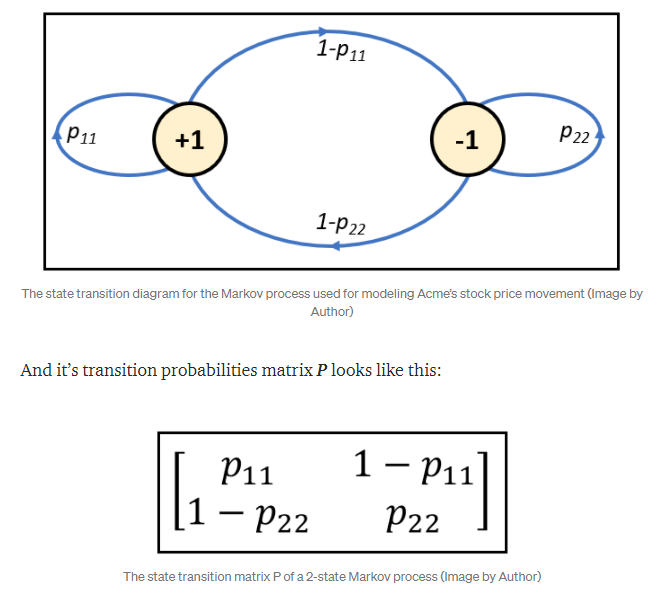

## Simulation du mouvement du cours d'une action à l'aide d'un processus de Markov
## Simulons le mouvement du cours de l'action Lambda à chaque pas de temps t en utilisant la distribution de probabilité π_t au temps t. La procédure de simulation se déroule comme suit :
## Supposons que le prix d'introduction en bourse d'Acme soit de 100 $
## Définissez la distribution de probabilité initiale :
π_0=[P(X_t = +1)=0,5, P(X_t = -1) = 0,5]
## Mappez l'état +1 de Markov à l'action d'augmenter le cours de clôture de la veille de l'action Lambda, d'un pourcentage aléatoire dans l'intervalle [0,0%, 2,0%]

## Mappez l'état -1 de Markov pour réduire le cours de clôture d'Acme la veille d'un pourcentage aléatoire similaire dans l'intervalle [0,0 %, 2,0 %]

## A chaque pas de temps t, calculez la distribution de probabilité d'état π_t=[P(X_t = +1), P(X_t = -1) = 0.5], en utilisant la formule π_t = π_0*P^t

## Methode : Génération d'un nombre aléatoire uniformément distribué dans l'intervalle [0, 1,0]. Si ce nombre est inférieur ou égal à π_1t = P(X_t = +1), augmentation du cours de clôture du pas de temps précédent d'un pourcentage aléatoire dans l'intervalle [0,0%, 2,0%], sinon diminution du cours de clôture précédent du même pourcentage aléatoire. Répétition de cette procédure pour autant d'étapes de temps que nécessaire


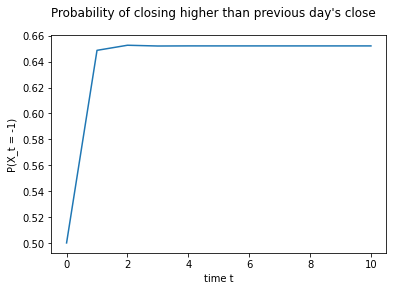

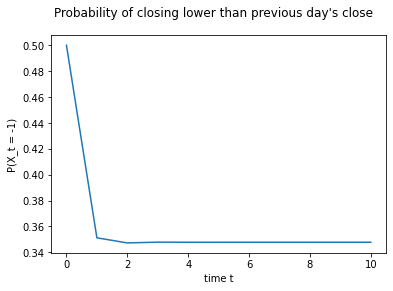

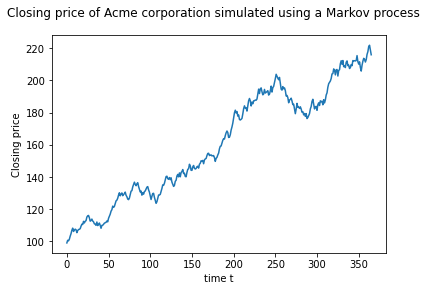

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math

#initialize the transition matrix P
P=np.array([[0.6,0.4],[0.75,0.25]])
#initialize pi_0
pi_0=np.array([0.5, 0.5])

#set up the array to accumulate the state probabilities at times t=1 to 20
pi=[]
pi.append(pi_0)

P_mul=P.copy()

#calculate the state probability for each t and store it away
for i in range(10):
    P_mul=np.matmul(P_mul,P)
    pi_t = np.matmul(pi_0,P_mul)
    pi.append(pi_t)

pi = np.array(pi)

fig = plt.figure()
#plot pi_1t = P(X_t = +1) versus t
fig.suptitle('Probability of closing higher than previous day\'s close')
plt.xlabel('time t')
plt.ylabel('P(X_t = -1)')
plt.plot(range(len(pi)), pi[:,0])
plt.show()

fig = plt.figure()
#plot pi_2t = P(X_t = -1) versus t
fig.suptitle('Probability of closing lower than previous day\'s close')
plt.xlabel('time t')
plt.ylabel('P(X_t = -1)')
plt.plot(range(len(pi)), pi[:,1])
plt.show()

#Simulate the closing price of a company
closing_price = 100.0
#initialize pi_0
pi_0=np.array([0.5, 0.5])
#create a random delta in the range [0, 2.0]
delta = random.random() * 2
#generate a random number in the range [0.0, 1.0]
r = random.random()
#if r <= P(X_t = +1), increase the closing price by delta,
#else decrease the closing price by delta
if r <= pi_0[0]:
    closing_price = closing_price*(100+delta)/100
else:
    closing_price = max(closing_price*(100-delta)/100,1.0)
#accumulate the new closing price
closing_prices = [closing_price]
P_mul=P.copy()
T=365
#now repeat this procedure 365 times
for i in range(T):
    #calculate the i-step transition matrix P^i
    P_mul=np.matmul(P_mul,P)
    #multiply it by pi_0 to get the state probability for time i
    pi_t = np.matmul(pi_0,P_mul)
    # create a random delta in the range [0, 2.0]
    delta = random.random() * 2
    # generate a random number in the range [0.0, 1.0]
    r = random.random()
    # if r <= P(X_t = +1), increase the closing price by delta,
    # else decrease the closing price by delta
    if r <= pi_t[0]:
        closing_price = max(closing_price*(100+delta)/100,1.0)
    else:
        closing_price = closing_price*(100-delta)/100
    # accumulate the new closing price
    closing_prices.append(closing_price)

#plot all the accumulated closing prices
fig = plt.figure()
fig.suptitle('Closing price of Acme corporation simulated using a Markov process')
plt.xlabel('time t')
plt.ylabel('Closing price')
plt.plot(range(T+1), closing_prices)
plt.show()